In [1]:
# In this notebook we load the trained model and use it to predict on some sample test images

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import image
#from keras.preprocessing.image import ImageDataGenerator
#from keras.models import Sequential
#from keras.layers import Conv2D, MaxPooling2D
#from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.models import load_model

import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

Using TensorFlow backend.


In [2]:
img_width=224
img_height=224

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [3]:
# Loading the custom trained ConvNet model

from keras.models import load_model
 
# load model
full_model = load_model('full_model.h5')
# summarize model.
full_model.summary()

W0827 11:37:39.940238 17364 deprecation_wrapper.py:119] From C:\Users\atuls\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 11:37:39.961545 17364 deprecation_wrapper.py:119] From C:\Users\atuls\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4420: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0827 11:37:39.975507 17364 deprecation_wrapper.py:119] From C:\Users\atuls\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4255: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0827 11:37:40.018986 17364 deprecation_wrapper.py:119] From C:\Users\atuls\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 11:37:40.018986 17364 deprecation_wrapper.py:119] From C:\Users\atuls\An

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_2 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)       

In [4]:
# Importing modules for loading, transforming and displaying images

from IPython.display import display
from PIL import Image
import os

In [5]:
img_dir = 'data/test/'

img_paths = []
for imgs in os.listdir(img_dir):
    img_paths.append(img_dir+imgs)

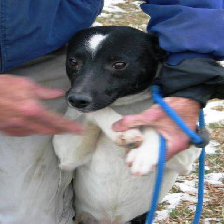

Dog


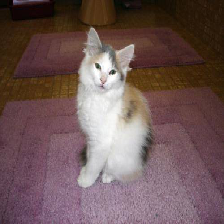

Dog


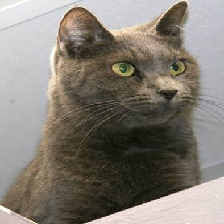

Cat


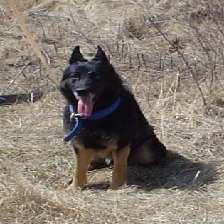

Dog


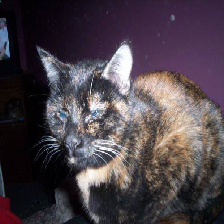

Dog


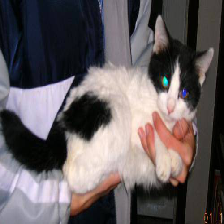

Dog


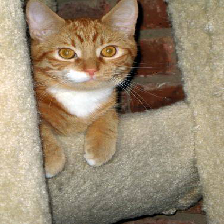

Dog


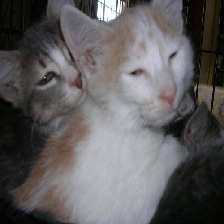

Cat


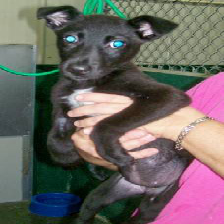

Dog


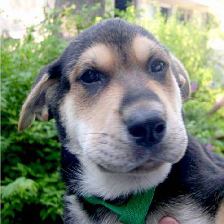

Dog


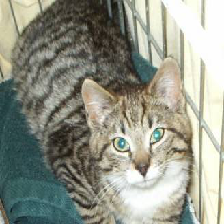

Dog


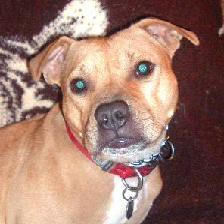

Dog


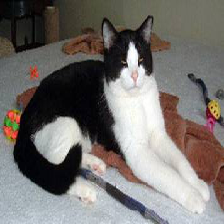

Dog


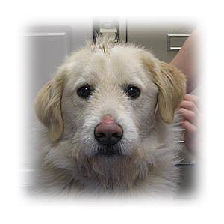

Dog


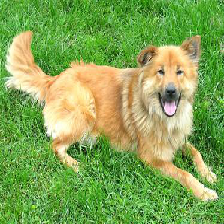

Dog


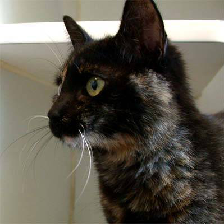

Cat


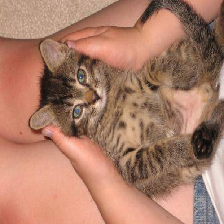

Dog


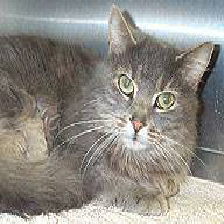

Cat


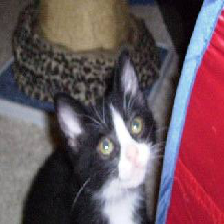

Cat


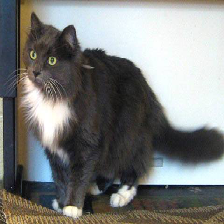

Cat


In [6]:
# Testing the custom trained ConvNet model to predict the classes if images in the test set.
# Note: The model has not seen these images before
# Given the model accuracy was ~75%, it does not do a perfect job of classifying the test images

for img in img_paths:
    img = image.load_img(img, target_size=(img_width, img_height))
    display(img)
    
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    result = full_model.predict(img)
    if result[0][0] >= 0.5:
        prediction = 'Dog'
    else:
        prediction = 'Cat'
        
    print(prediction)

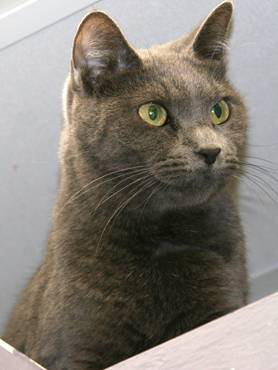

Cat


In [11]:
# Testing the model on a random image from the test set

img_path = 'data/test/11.jpg'
img=Image.open(img_path)
display(img)

test_image = image.load_img(img_path, target_size=(img_width,img_height))
test_image = image.img_to_array(test_image)
#print(test_image.shape)
test_image=np.expand_dims(test_image, axis=0)
#print(test_image.shape)

result = full_model.predict(test_image)
if result[0][0] >= 0.5:
    prediction = "Dog"
else:
    prediction = 'Cat'
    
print(prediction)